In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download mohammadhossein77/brain-tumors-dataset
!kaggle datasets download gazu468/cifar10-classification-image

Dataset URL: https://www.kaggle.com/datasets/mohammadhossein77/brain-tumors-dataset
License(s): CC0-1.0
 99% 218M/221M [00:03<00:00, 81.4MB/s]
100% 221M/221M [00:03<00:00, 62.8MB/s]
Dataset URL: https://www.kaggle.com/datasets/gazu468/cifar10-classification-image
License(s): unknown
 95% 133M/139M [00:03<00:00, 60.6MB/s]
100% 139M/139M [00:03<00:00, 47.2MB/s]


In [ ]:
!unzip 'brain-tumors-dataset.zip'
!unzip 'cifar10-classification-image.zip'

Streaming output truncated to the last 5000 lines.
  inflating: cifar10/train/truck/0001.png  
  inflating: cifar10/train/truck/0002.png  
  inflating: cifar10/train/truck/0003.png  
  inflating: cifar10/train/truck/0004.png  
  inflating: cifar10/train/truck/0005.png  
  inflating: cifar10/train/truck/0006.png  
  inflating: cifar10/train/truck/0007.png  
  inflating: cifar10/train/truck/0008.png  
  inflating: cifar10/train/truck/0009.png  
  inflating: cifar10/train/truck/0010.png  
  inflating: cifar10/train/truck/0011.png  
  inflating: cifar10/train/truck/0012.png  
  inflating: cifar10/train/truck/0013.png  
  inflating: cifar10/train/truck/0014.png  
  inflating: cifar10/train/truck/0015.png  
  inflating: cifar10/train/truck/0016.png  
  inflating: cifar10/train/truck/0017.png  
  inflating: cifar10/train/truck/0018.png  
  inflating: cifar10/train/truck/0019.png  
  inflating: cifar10/train/truck/0020.png  
  inflating: cifar10/train/truck/0021.png  
  inflating: cifar10/trai

In [ ]:
import os
import pandas as pd
from random import sample

In [ ]:
def get_image_paths(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    return image_paths

In [ ]:
cifar10_dir = '/content/cifar10/test'
cifar_classes = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
image_paths_cifar = []
for cifar_class in cifar_classes:
    class_dir = os.path.join(cifar10_dir, cifar_class) #(/content/cifar10/test/airplane) (/content/cifar10/test/bird) (/content/cifar10/test/cat) (/content/cifar10/test/deer) (/content/cifar10/test/dog) (/content/cifar10/test/frog) (/content/cifar10/test/horse) (/content/cifar10/test/ship) (/content/cifar10/test/truck)
    class_images = get_image_paths(class_dir)


    selected_images = sample(class_images, 700)
    image_paths_cifar.extend([(img, 0) for img in selected_images])

In [ ]:
brain_mri_dir = '/content/Data/Normal'

In [ ]:
brain_mri_images = get_image_paths(brain_mri_dir)
image_paths_brain = [(img, 1) for img in brain_mri_images]

In [ ]:
combined_data = image_paths_cifar + image_paths_brain #"A","B" = "AB"

In [ ]:
df = pd.DataFrame(combined_data, columns=['image_path', 'brain'])

In [ ]:
df

,image_path,brain
0,/content/cifar10/test/airplane/0197.png,0
1,/content/cifar10/test/airplane/0696.png,0
2,/content/cifar10/test/airplane/0957.png,0
3,/content/cifar10/test/airplane/0372.png,0
4,/content/cifar10/test/airplane/0859.png,0
...,...,...
10061,/content/Data/Normal/N_221_SP_.jpg,1
10062,/content/Data/Normal/N_50_RO_.jpg,1
10063,/content/Data/Normal/N_146_DA_.jpg,1
10064,/content/Data/Normal/N_44.jpg,1


brain
0    7000
1    3066
Name: count, dtype: int64


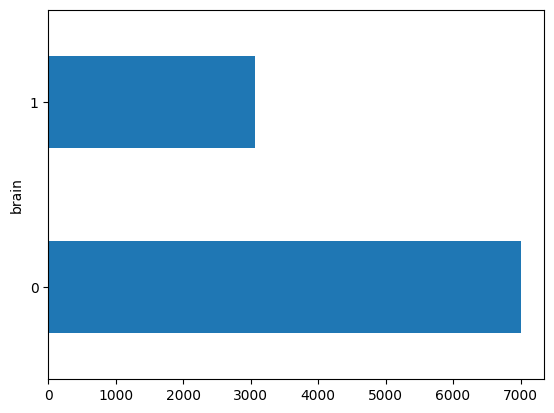

In [ ]:
df['brain'].value_counts().plot(kind='barh') 
print(df['brain'].value_counts())

In [ ]:
b={
    0: 'non_brain',
    1: 'brain',
}

In [ ]:
df['class'] = df['brain'].map(b.get)

In [ ]:
df

,image_path,brain,class
0,/content/cifar10/test/airplane/0197.png,0,non_brain
1,/content/cifar10/test/airplane/0696.png,0,non_brain
2,/content/cifar10/test/airplane/0957.png,0,non_brain
3,/content/cifar10/test/airplane/0372.png,0,non_brain
4,/content/cifar10/test/airplane/0859.png,0,non_brain
...,...,...,...
10061,/content/Data/Normal/N_221_SP_.jpg,1,brain
10062,/content/Data/Normal/N_50_RO_.jpg,1,brain
10063,/content/Data/Normal/N_146_DA_.jpg,1,brain
10064,/content/Data/Normal/N_44.jpg,1,brain


In [ ]:
from sklearn.model_selection import train_test_split
# test data set, train data set, validation data set
#10%, 80%, 10%
#15% 70%, 15%

In [ ]:
train_int , val = train_test_split(df, test_size= 0.15, stratify=df['brain'])
train, test = train_test_split(train_int, test_size= 0.15 / (1 - 0.15), stratify= train_int['brain'])

In [ ]:
print(train.shape)
print(test.shape)
print(val.shape)

(7046, 3)
(1510, 3)
(1510, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
path = '/content'

In [ ]:
datagen= ImageDataGenerator(

        horizontal_flip=True,
        rescale=1/255,

)

datagen_2 = ImageDataGenerator(
    rescale=1/255
)


train_data_gen = datagen.flow_from_dataframe(
    dataframe= train,
    directory= path,
    x_col="image_path",
    y_col="class",
    target_size=(32,32),
    batch_size=32,
    class_mode="binary"
)

test_data_gen = datagen_2.flow_from_dataframe(
    dataframe= test,
    directory= path,
    x_col="image_path",
    y_col="class",
    target_size=(32,32),
    batch_size=32,
    class_mode="binary"
)

val_data_gen = datagen_2.flow_from_dataframe(
    dataframe= val,
    directory= path,
    x_col="image_path",
    y_col="class",
    target_size=(32,32),
    batch_size=32,
    class_mode="binary"
)

Found 7046 validated image filenames belonging to 2 classes.
Found 1510 validated image filenames belonging to 2 classes.
Found 1510 validated image filenames belonging to 2 classes.


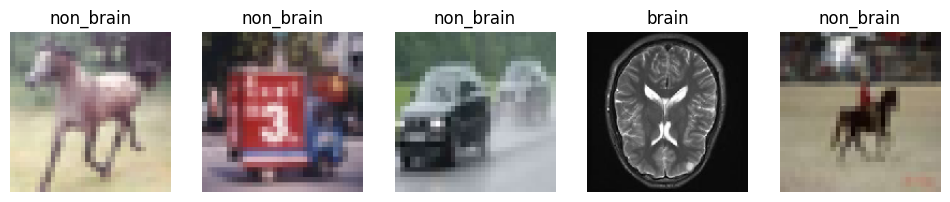

In [ ]:
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image

num=5

train_data = val

sample_indices= train_data.sample(num).index

plt.figure(figsize=(12,6))
for i, idx in enumerate(sample_indices):
  img_path= train_data.loc[idx,"image_path"]
  img= image.load_img(img_path,target_size=(150,150))
  plt.subplot(1, num, i+1)
  plt.imshow(img)
  plt.title(train_data.loc[idx, "class"])
  plt.axis("off")

plt.show()

In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.models import Sequential

In [ ]:
my_model = Sequential()


my_model.add(Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)))
my_model.add(MaxPool2D((2,2)))


my_model.add(Conv2D(32,(3,3),activation='relu'))
my_model.add(MaxPool2D((2,2)))

my_model.add(Conv2D(64,(3,3),activation='relu'))
my_model.add(MaxPool2D((2,2)))

my_model.add(Dropout(0.25))

my_model.add(Flatten())


my_model.add(Dense(64,activation='relu'))
my_model.add(Dense(32,activation='relu'))
my_model.add(Dense(1,activation='sigmoid'))


my_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,145 (164.63 KB)

 Trainable params: 42,145 (164.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=40,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor="val_accuracy",filepath='./bestmodel.keras',verbose=1,save_best_only=True,mode='auto')


cd = [es,mc]

In [ ]:
import tensorflow as tf

my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hs=my_model.fit(train_data_gen,epochs=100,verbose=1,steps_per_epoch=20,validation_data=val_data_gen,validation_steps=20,callbacks=cd)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6733 - loss: 0.6301
Epoch 1: val_accuracy improved from -inf to 0.71875, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6740 - loss: 0.6283 - val_accuracy: 0.7188 - val_loss: 0.5010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7366 - loss: 0.5039
Epoch 2: val_accuracy improved from 0.71875 to 0.96562, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7388 - loss: 0.5023 - val_accuracy: 0.9656 - val_loss: 0.4108
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8938 - loss: 0.3580
Epoch 3: val_accuracy improved from 0.96562 to 0.98261, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8950 - loss: 0.3540 - val_accuracy: 0.9826 - val_loss: 0.0722
Epoch 4/100
 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9497 - loss: 0.1125

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9534 - loss: 0.1142
Epoch 4: val_accuracy improved from 0.98261 to 0.99219, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9538 - loss: 0.1137 - val_accuracy: 0.9922 - val_loss: 0.0366
Epoch 5/100
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9766 - loss: 0.0599
Epoch 5: val_accuracy did not improve from 0.99219
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9765 - loss: 0.0606 - val_accuracy: 0.9844 - val_loss: 0.0598
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9915 - loss: 0.0395
Epoch 6: val_accuracy improved from 0.99219 to 1.00000, saving model to ./bestmodel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9915 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 7/100
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9854 - loss: 0.0395
Epoch 7: val_accuracy did not improve from 1.00000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/ste

In [ ]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

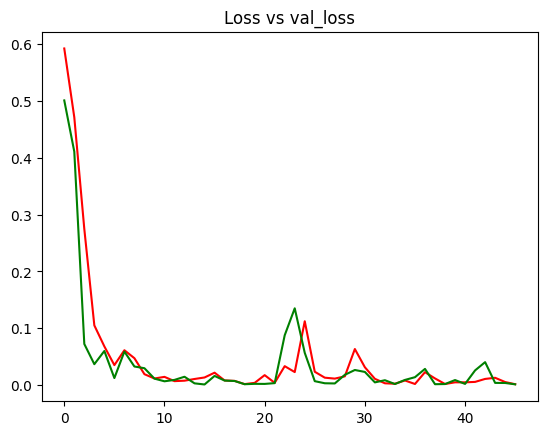

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['loss'],c="red")
plt.plot(h['val_loss'],c="green")
plt.title("Loss vs val_loss")
plt.show()

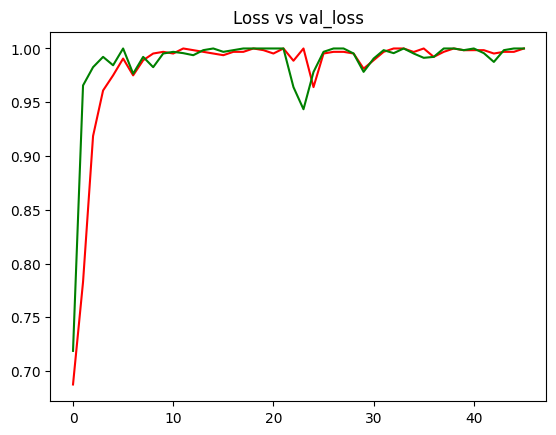

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'],c="red")
plt.plot(h['val_accuracy'],c="green")
plt.title("Loss vs val_loss")
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/bestmodel.keras')
acc= model.evaluate(test_data_gen)[1]
acc*100

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9982 - loss: 0.0147


99.6688723564148

In [ ]:
model.save('./bestmodel.h5')